In [23]:
#read train data
import pandas as pd
original_train_data = pd.read_csv('../original_data/train_X.csv')
original_train_label = pd.read_csv('../original_data/train_y.csv')


In [24]:
data = pd.concat([original_train_data, original_train_label], axis=1)

In [20]:
profile = ProfileReport(data, title='Netflix Profile Report', explorative=True)
 
profile.to_file('Report.html')

TypeCheckError: argument "config_file" (None) did not match any element in the union:
  pathlib.Path: is not an instance of pathlib.Path
  str: is not an instance of str

In [25]:
grouped_df = data.groupby('has_died')['pre_icu_los_days'].describe()

In [17]:
print(grouped_df.describe())

              count      mean       std        min       25%       50%  \
count      2.000000  2.000000  2.000000   2.000000  2.000000  2.000000   
mean   22469.500000  1.060619  2.919844 -12.234375  0.035069  0.139236   
std    26292.351445  0.383118  0.634174   2.178773  0.000491  0.002455   
min     3878.000000  0.789714  2.471415 -13.775000  0.034722  0.137500   
25%    13173.750000  0.925167  2.695629 -13.004687  0.034896  0.138368   
50%    22469.500000  1.060619  2.919844 -12.234375  0.035069  0.139236   
75%    31765.250000  1.196072  3.144058 -11.464063  0.035243  0.140104   
max    41061.000000  1.331525  3.368273 -10.693750  0.035417  0.140972   

            75%         max  
count  2.000000    2.000000  
mean   0.606771  111.459028  
std    0.295364   67.361742  
min    0.397917   63.827083  
25%    0.502344   87.643056  
50%    0.606771  111.459028  
75%    0.711198  135.275000  
max    0.815625  159.090972  


In [19]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score
import numpy as np
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
import pandas as pd
from scipy.interpolate import interp1d
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
import argparse
loaded_model = XGBClassifier(n_estimators=2200, random_state=42, eta=0.01, max_depth=17, subsample=0.8, colsample_bytree=0.8, gamma=0.1, scale_pos_weight=10)
loaded_model.load_model('model.json')

c:\Users\Steven\anaconda3\envs\datamining\lib\site-packages\xgboost\sklearn.py:782: UserWarning: Loading a native XGBoost model with Scikit-Learn interface.
  warnings.warn("Loading a native XGBoost model with Scikit-Learn interface.")


In [20]:
import shap

train_data = pd.read_csv('../preprocessed_data/selected_train_X.csv')
explainer = shap.Explainer(loaded_model)
shap_values = explainer(train_data)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


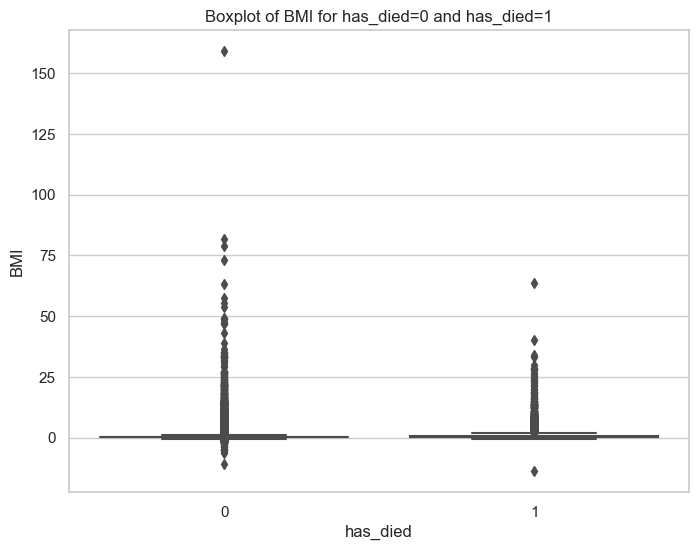

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x='has_died', y='pre_icu_los_days', data=data)
plt.title('Boxplot of BMI for has_died=0 and has_died=1')
plt.xlabel('has_died')
plt.ylabel('BMI')
plt.show()

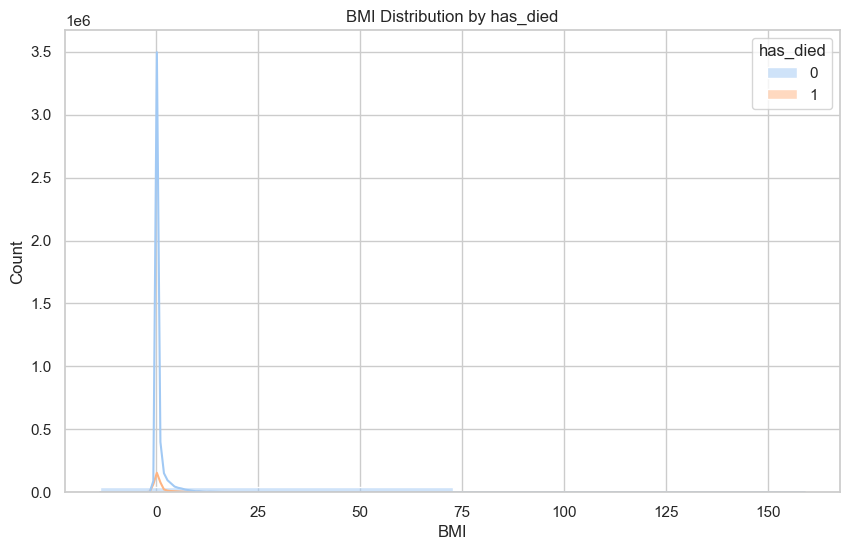

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置Seaborn样式
sns.set(style="whitegrid")

# 使用直方图显示'bmi'分布
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='pre_icu_los_days', hue='has_died', kde=True, bins=20, palette='pastel')
plt.title('BMI Distribution by has_died')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()